<h1>Pich Detection 

<h2> Pich detection Method's

<ul>
  <li>Zero-Crossing</li>
  <li>Autocorrelation Function</li>
  <li>CEPSTRUM</li>
  <li>Average Magnitude Differential Function</li>
  <li>Comb Transformation</li>
  <li>FIR Filter Method of Periodic Prediction</li>
  <li>Links</li>
  <li>Bibliography</li>
</ul>

<h5>the refrence fot other method https://sound.eti.pg.gda.pl/student/eim/synteza/leszczyna/index_ang.htm#fromHistory</h5>

Autocorrelation - the basic theory

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>R</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>f</mi>
      <mi>f</mi>
    </mrow>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>l</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mi>N</mi>
  </munderover>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <mi>n</mi>
  <mo stretchy="false">)</mo>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <mi>n</mi>
  <mo>&#x2212;</mo>
  <mi>l</mi>
  <mo stretchy="false">)</mo>
  <mo>.</mo>
</math>

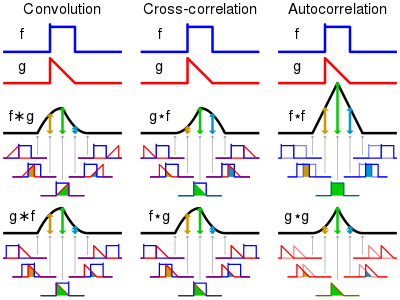

In [11]:
from IPython import display
display.Image("D:\GitHub_Repository\Audio_Signal_Processing\Image\Comparison_convolution_correlation.svg.png")

HOW it's Work

Determine the sampling rate (s) for the signal

Compute the autocorrelation for the signal

Find peak lag (l) from the autocorrelation l > 0 .

Compute the corresponding pitch frequency for the peak lag f s/l .

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd

from glob import glob
import librosa
import librosa.display
import statsmodels.api as sm
from scipy.signal import find_peaks

<h2>Reading audio files

In [13]:
audio_files = glob('D:\GitHub_Repository\Audio_Signal_Processing\Sound\*')
audio_files

['D:\\GitHub_Repository\\Audio_Signal_Processing\\Sound\\B_Sound_Consonant.wav',
 'D:\\GitHub_Repository\\Audio_Signal_Processing\\Sound\\Energy and Zero Cross rate.wav',
 'D:\\GitHub_Repository\\Audio_Signal_Processing\\Sound\\Extraxt Gam frequency.wav']

In [14]:
#play audio file 
ipd.Audio(audio_files[0])

Loading the data set is simple as `librosa` takes care of all the details.

In [15]:
y, sr = librosa.load(audio_files[0])
print(f'Sample Rate :{sr}')

Sample Rate :22050


In [16]:
# Get some useful statistics
T = 1/sr # Sampling period
N = len(y) # Signal length in samples
t = N / sr # Signal length in seconds

Computing the spectrum is optional. We use it to verify our results.

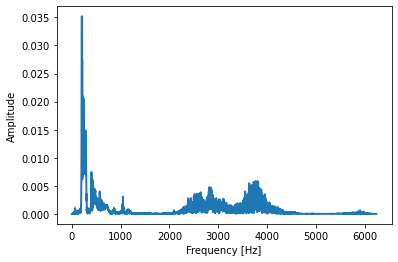

In [17]:
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT
Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
Pxx = np.abs(Y_k) # Power spectrum

f = sr * np.arange((N/2)) / N; # frequencies

# plotting
fig,ax = plt.subplots()
plt.plot(f[0:5000], Pxx[0:5000], linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

Use statsmodels acf function to compute the autocorrelation. We limit the number of lags to compute to 2000. This is because we have a rough idea for the range of the pitch.

In [18]:
auto = sm.tsa.acf(y, nlags=2000)

In [19]:
peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
lag = peaks[0] # Choose the first peak as our pitch component lag

In [20]:
pitch = sr / lag # Transform lag into frequency
print(f'Pich frequency :{pitch}')

Pich frequency :3675.0
